In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [4]:
file_path="/content/glass.xlsx"
all_sheets=pd.read_excel(file_path,sheet_name=None)
Description=all_sheets["Description"]
glass=all_sheets["glass"]
glass


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
glass.shape

(214, 10)

In [6]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
glass.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [8]:
glass[glass.duplicated()].shape

(1, 10)

In [9]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [10]:
glass1=glass.drop_duplicates(ignore_index=True)
glass1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [11]:
glass1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


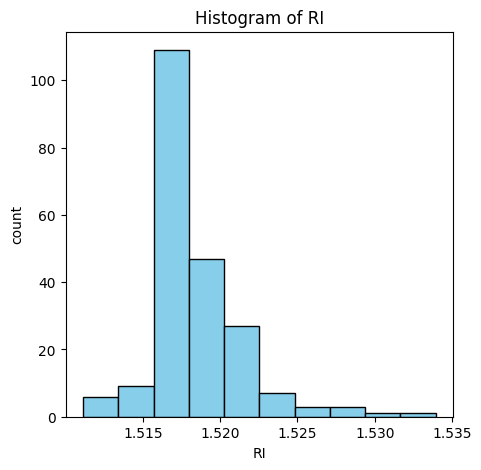

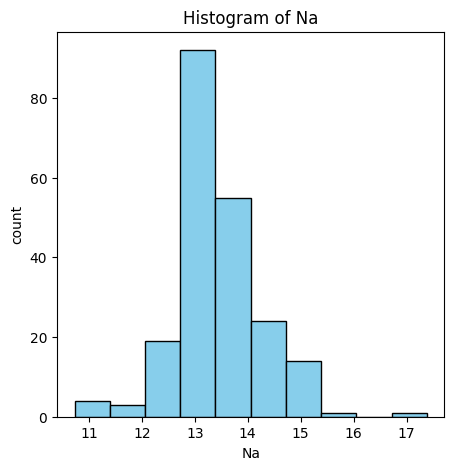

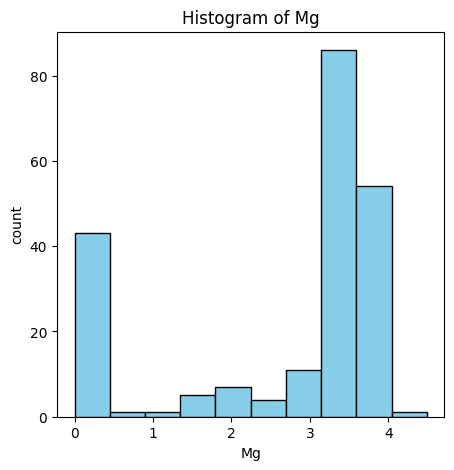

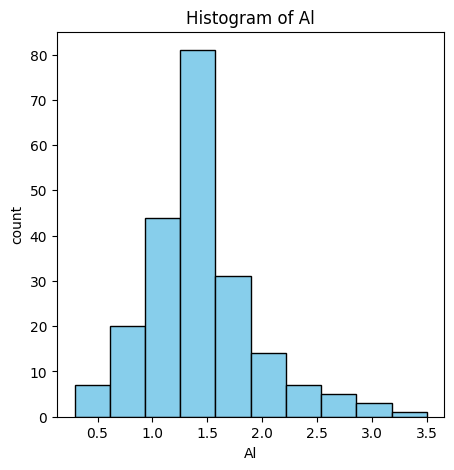

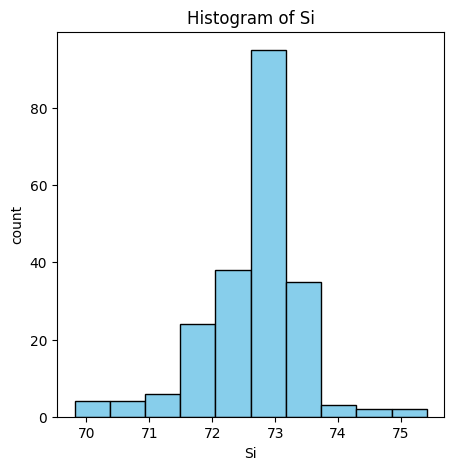

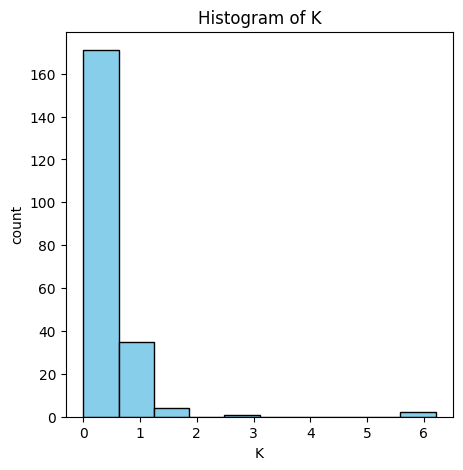

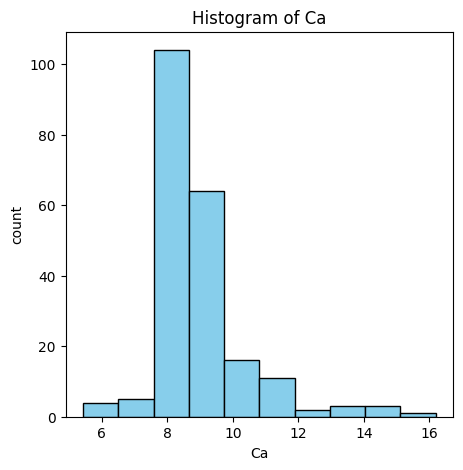

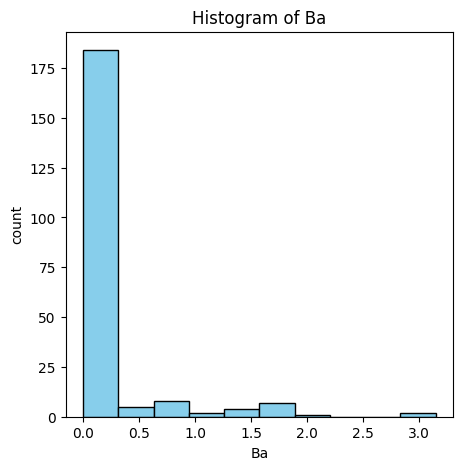

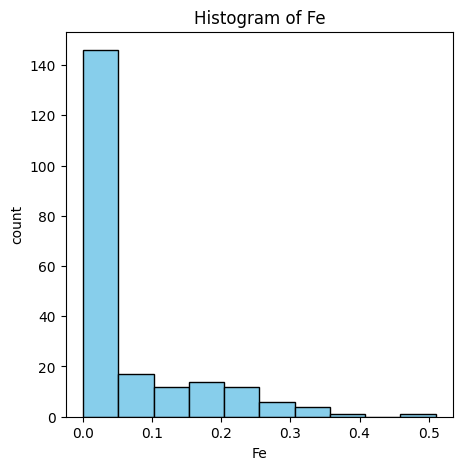

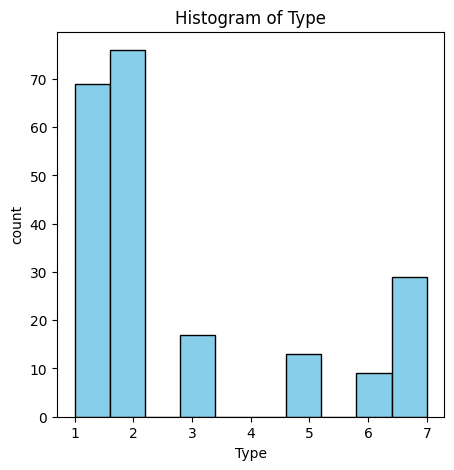

In [12]:
for col in glass1:
  plt.figure(figsize=(5,5))
  plt.hist(glass1[col],color="skyblue",edgecolor="black")
  plt.title(f"Histogram of {col}")
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

In [13]:
glass1.skew()

,0
RI,1.648017
Na,0.465699
Mg,-1.146096
Al,0.938402
Si,-0.744646
K,6.545429
Ca,2.050752
Ba,3.406749
Fe,1.747173
Type,1.108861


In [14]:
glass1.var()

,0
RI,0.000009
Na,0.666937
Mg,2.084244
Al,0.245942
Si,0.599073
K,0.426651
Ca,2.033138
Ba,0.248248
Fe,0.009524
Type,4.431571


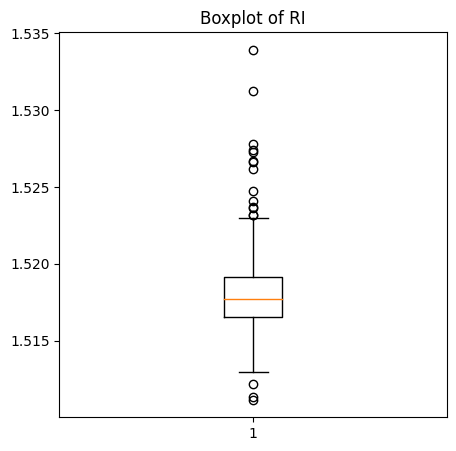

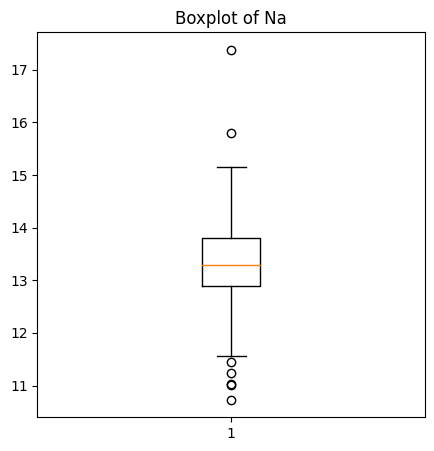

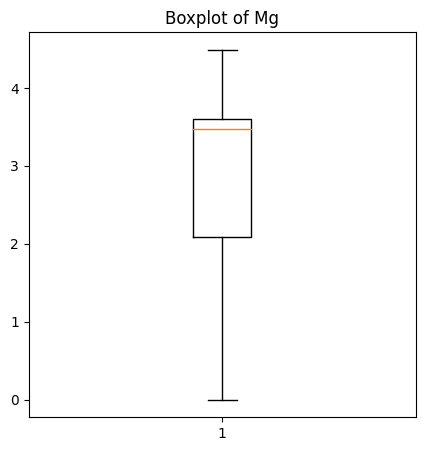

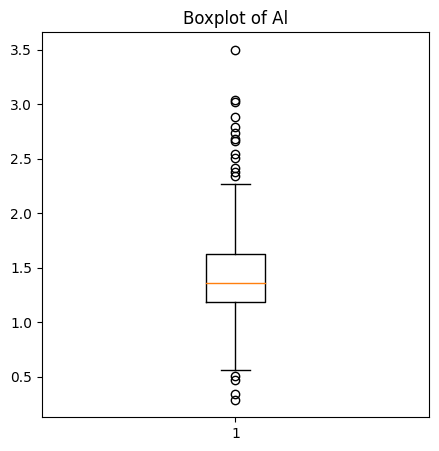

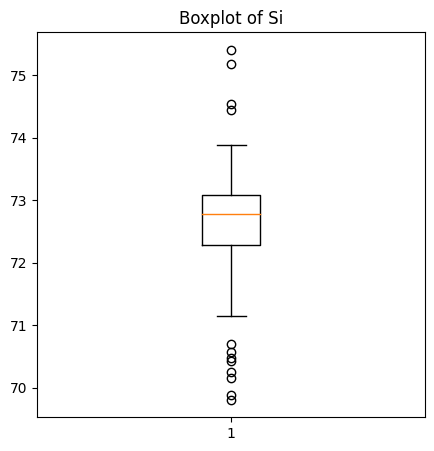

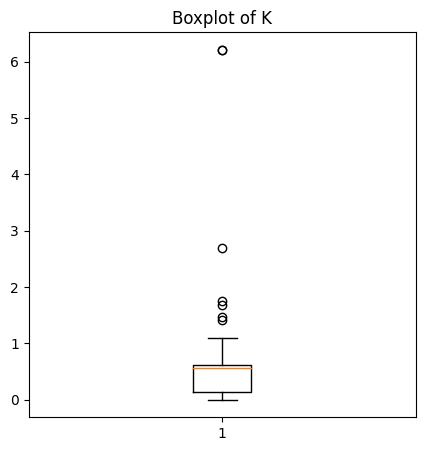

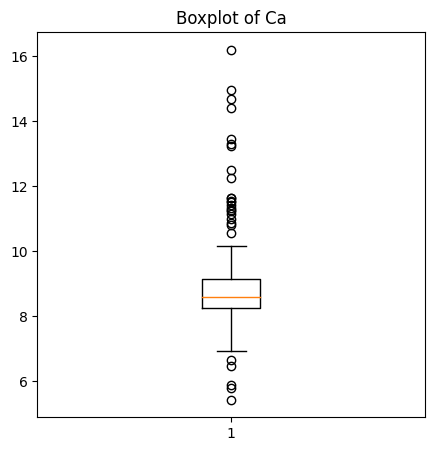

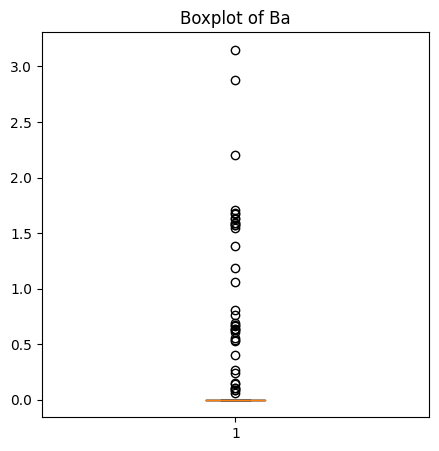

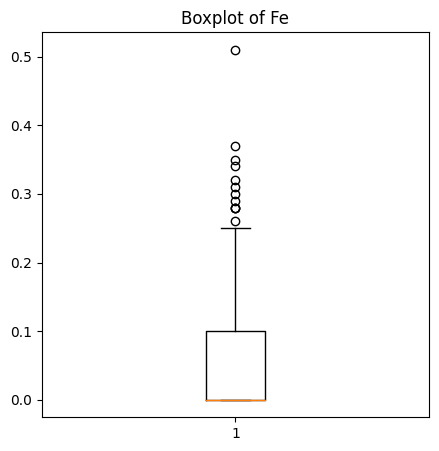

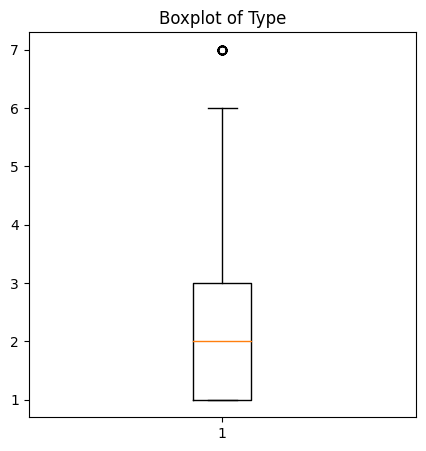

In [16]:
for col in glass1:
  plt.figure(figsize=(5,5))
  plt.boxplot(glass1[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

In [17]:
glass2=glass1.copy()

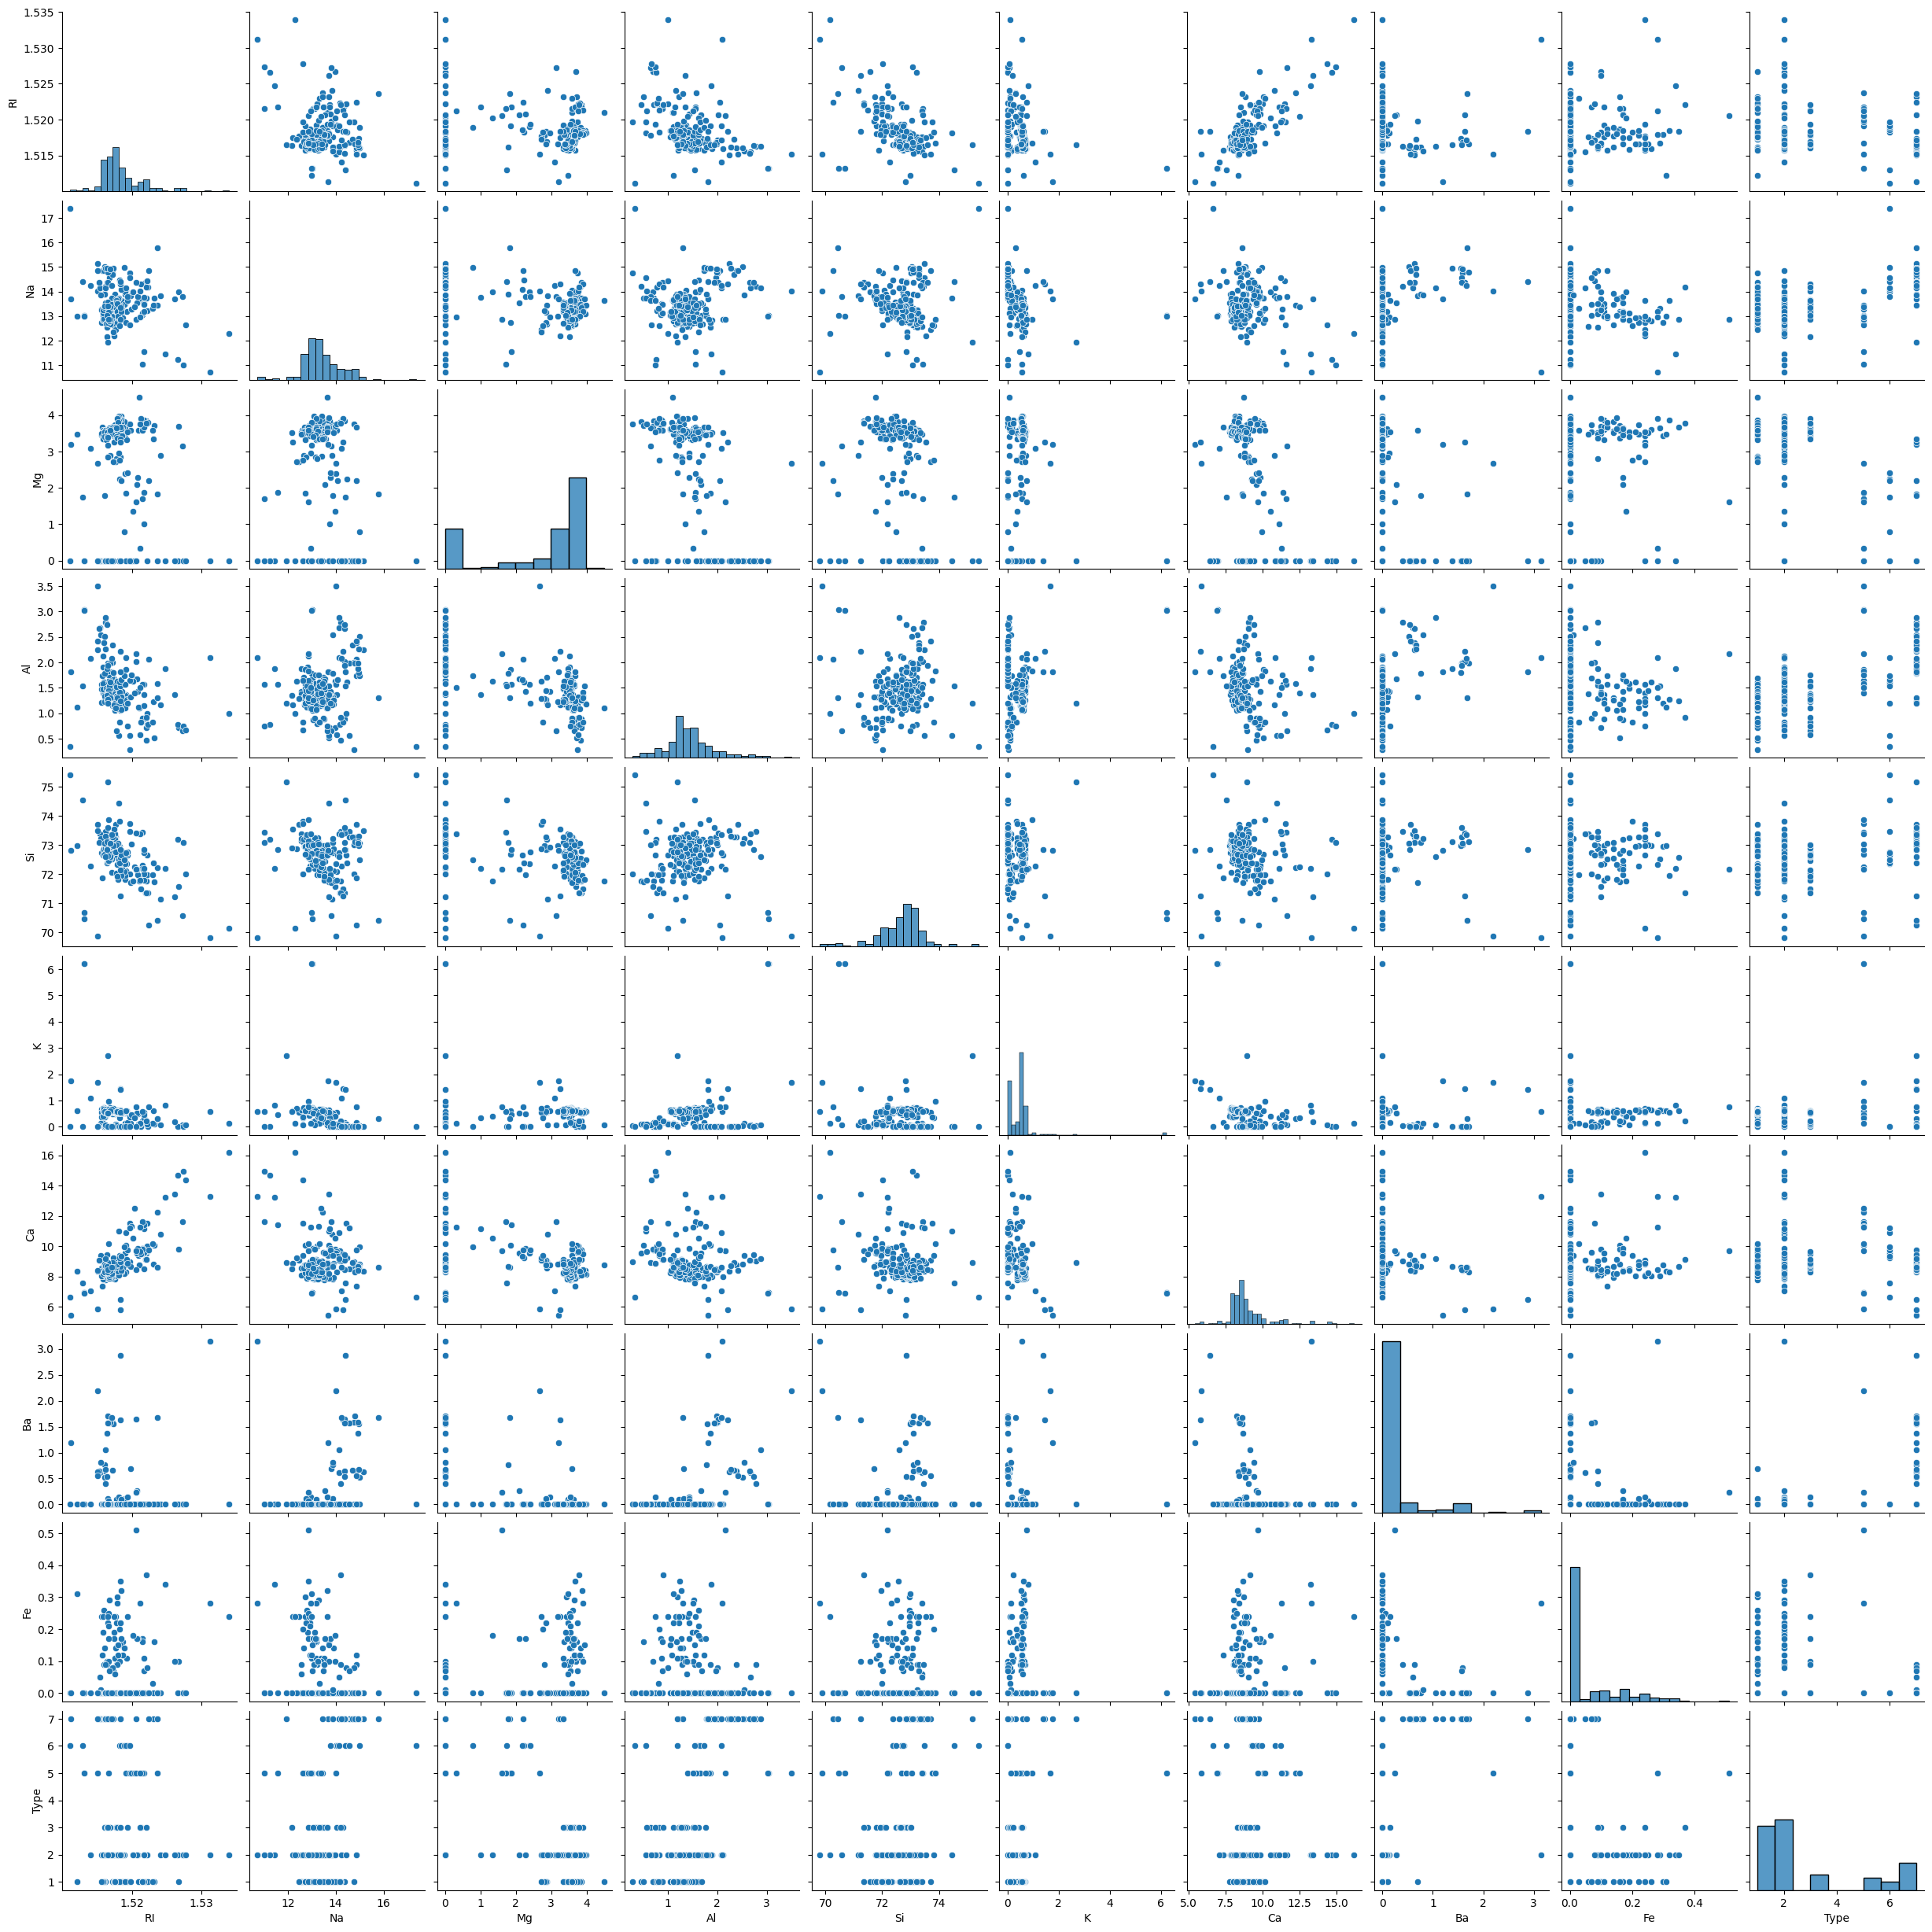

In [19]:
sns.pairplot(glass1)

In [24]:
from sklearn.ensemble import IsolationForest
iso_forest=IsolationForest(contamination=0.05)
outliers=iso_forest.fit_predict(glass1.select_dtypes(include=["number"]))
df_no_outliers=glass1[outliers!=-1].reset_index(drop=True)
df_no_outliers

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
197,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
198,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
199,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
200,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [25]:
x=df_no_outliers.iloc[:,0:9]
y=df_no_outliers.iloc[:,9]

In [26]:
corr_matrix=x.corr()
corr_matrix

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.073237,-0.095819,-0.499122,-0.575358,-0.330225,0.763353,-0.166592,0.006006
Na,-0.073237,1.000000,-0.380795,0.314583,-0.247623,-0.545655,-0.153029,0.520788,-0.170585
Mg,-0.095819,-0.380795,1.000000,-0.524290,-0.311851,0.535619,-0.515698,-0.584338,0.137623
Al,-0.499122,0.314583,-0.524290,1.000000,0.274763,0.007655,-0.253044,0.531030,-0.088737
Si,-0.575358,-0.247623,-0.311851,0.274763,1.000000,0.026860,-0.172425,0.176596,-0.044904
K,-0.330225,-0.545655,0.535619,0.007655,0.026860,1.000000,-0.442918,-0.368682,0.144766
Ca,0.763353,-0.153029,-0.515698,-0.253044,-0.172425,-0.442918,1.000000,-0.128428,-0.029019
Ba,-0.166592,0.520788,-0.584338,0.531030,0.176596,-0.368682,-0.128428,1.000000,-0.115245
Fe,0.006006,-0.170585,0.137623,-0.088737,-0.044904,0.144766,-0.029019,-0.115245,1.000000


In [27]:
best_abs=corr_matrix.abs()
np.fill_diagonal(best_abs.values,0)
best_corr_value=best_abs.max().max()
best_corr_value

0.7633533815220485

In [28]:
best_indices=np.where(best_abs==best_corr_value)
best_corr_pair=[(corr_matrix.index[i],corr_matrix.columns[j]) for i,j in zip(*best_indices)]
best_corr_pair

[('RI', 'Ca'), ('Ca', 'RI')]

In [30]:
ss=StandardScaler()
ss_df=ss.fit_transform(x)
pd.DataFrame(ss_df)

,0,1,2,3,4,5,6,7,8
0,1.068818,0.330846,1.239908,-0.725249,-1.493152,-1.327342,-0.167173,-0.347528,-0.589876
1,-0.269885,0.679505,0.591950,-0.143987,0.046949,0.229143,-0.922338,-0.347528,-0.589876
2,-0.832927,0.177436,0.555548,0.258424,0.468451,-0.104389,-0.963380,-0.347528,-0.589876
3,-0.250198,-0.268847,0.657474,-0.300481,-0.147590,0.562675,-0.602214,-0.347528,-0.589876
4,-0.344694,-0.185169,0.606511,-0.412262,0.614355,0.488557,-0.725338,-0.347528,-0.589876
...,...,...,...,...,...,...,...,...,...
197,-0.813240,1.028164,-2.029007,3.254156,-0.147590,-1.253223,0.185784,2.475410,-0.589876
198,-0.569124,2.115979,-2.029007,1.264454,0.581932,-1.549697,-0.454464,3.886879,-0.589876
199,0.927073,1.334983,-2.029007,1.331522,1.165550,-1.549697,-0.421631,4.020036,-0.589876
200,-0.702994,1.362876,-2.029007,1.152673,1.473570,-1.549697,-0.388798,3.833616,-0.589876


In [31]:
X=ss_df


Random Forest Model

In [32]:
from sklearn.model_selection import KFold,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)
kfold=KFold(n_splits=10,random_state=42,shuffle=True)
model=RandomForestClassifier(n_estimators=100,max_features=3,random_state=42)
result=cross_val_score(model,X,y,cv=kfold)
print(result.mean())


0.7764285714285715


In [33]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3, random_state=42)

In [34]:
pred=model.predict(x_test)

In [36]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        13
           2       0.94      0.94      0.94        16
           3       0.00      0.00      0.00         2
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4

    accuracy                           0.90        41
   macro avg       0.79      0.79      0.79        41
weighted avg       0.87      0.90      0.88        41



In [38]:
print("accuracy of Random forest Model:",accuracy_score(y_test,pred))

accuracy of Random forest Model: 0.9024390243902439


Bagging model

In [39]:
cart=DecisionTreeClassifier()
model1=BaggingClassifier(base_estimator=cart,n_estimators=500,random_state=42)
result1=cross_val_score(model1,X,y,cv=kfold)
print(result1.mean())

0.7769047619047619


In [40]:
model1.fit(x_train,y_train)
pred1=model1.predict(x_test)
print("accuracy of Bagging model:",accuracy_score(y_test,pred1))


accuracy of Bagging model: 0.8292682926829268


Boosting Model

In [43]:
model2=AdaBoostClassifier(n_estimators=100,random_state=42)
result2=cross_val_score(model2,X,y,cv=kfold)
print(result2.mean())


0.4004761904761905


In [44]:
model2.fit(x_train,y_train)
pred2=model2.predict(x_test)
print("accuracy of AdaptiveBoosting model:",accuracy_score(y_test,pred2))

accuracy of AdaptiveBoosting model: 0.36585365853658536


In [45]:
print("accuracy of Random forest Model:",accuracy_score(y_test,pred))
print("accuracy of Bagging model:",accuracy_score(y_test,pred1))
print("accuracy of AdaptiveBoosting model:",accuracy_score(y_test,pred2))


accuracy of Random forest Model: 0.9024390243902439
accuracy of Bagging model: 0.8292682926829268
accuracy of AdaptiveBoosting model: 0.36585365853658536


In [ ]:
# Explain Bagging and Boosting methods.How it is different from each other

# Bagging:
# Bagging, short for Bootstrap Aggregating, is an ensemble method that aims to improve the accuracy and stability of machine learning models.
# It works by creating multiple subsets of the training data (with replacement) and training a separate model on each subset.
# The final prediction is made by aggregating the predictions of all individual models, typically by averaging or voting.

# Boosting:
# Boosting is another ensemble method that sequentially builds a strong model by combining multiple weak learners.
# It starts with a simple model and iteratively adds new models that focus on correcting the errors made by the previous models.
# Each subsequent model is given more weight in the final prediction, based on its performance.
# Common boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.


# **Bagging (Bootstrap Aggregating):**
# 1. **Parallel Training:**  Base models (often decision trees) are trained independently and in parallel on different random subsets of the training data (created using bootstrapping - sampling with replacement).
# 2. **Aggregation:** The predictions of individual models are combined, usually by averaging (for regression) or voting (for classification), to produce the final prediction.
# 3. **Reduces Variance:** Bagging primarily aims to reduce variance (overfitting) by creating multiple models that see slightly different versions of the data.

# **Boosting:**
# 1. **Sequential Training:** Base models (typically weak learners like decision stumps) are trained sequentially, with each model trying to correct the errors made by the previous one.
# 2. **Weighted Data:**  Each data point is assigned a weight, which is adjusted after each model is trained. Misclassified instances get higher weights, so subsequent models focus more on them.
# 3. **Weighted Voting:** The predictions of individual models are combined using a weighted vote, where models that perform better on difficult instances have a stronger influence.
# 4. **Reduces Bias:** Boosting primarily aims to reduce bias (underfitting) by iteratively improving the model's ability to fit the training data.


In [ ]:
#Explain how to handle imbalance in the data.

#Handling imbalanced data involves techniques like oversampling the minority class
#         (e.g., using SMOTE to create synthetic samples), undersampling the majority class, using cost-sensitive learning to penalize misclassifications of minority instances,
#         and employing ensemble methods like Bagging or Boosting. Additionally, choose evaluation metrics like Precision, Recall, F1-score, or ROC AUC Curve to better assess model performance on imbalanced datasets.
